In [102]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
# Load the new dataset
df = pd.read_csv('D600 Task 3 Dataset 1 Housing Information.csv')

# Drop the 
df = df.drop(columns=['ID', 'Fireplace', 'HouseColor', 'Garage', 'IsLuxury'])

# Preview th,e data
print("Data Shape:", df.shape)
df.head()

Data Shape: (7000, 17)


,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,EmploymentRate,PropertyTaxRate,RenovationQuality,LocalAmenities,TransportAccess,Floors,Windows,PreviousSalePrice
0,255614.90,566.62,1.00,4,779.42,20.56,5.62,39.46,10.08,97.29,1.84,4.93,4.44,4.55,1,13,181861.54
1,155586.09,1472.34,1.00,2,656.13,15.62,5.63,40.51,7.89,93.22,0.95,4.08,5.56,6.83,1,17,50042.60
2,131050.83,550.00,1.78,3,754.57,12.47,9.20,48.38,23.74,96.60,1.87,4.26,8.07,8.48,2,34,48400.34
3,151361.71,941.81,2.04,2,439.59,22.22,7.08,94.67,5.22,91.45,1.45,4.45,5.00,6.27,1,14,84594.12
4,113167.61,550.00,1.06,3,353.03,8.28,5.93,16.80,43.13,86.50,1.26,3.36,5.46,6.99,1,21,22934.60


In [103]:


# Remove rows with negative values
initial_rows = df.shape[0]
if 'PreviousSalePrice' in df.columns:
    df = df[df['PreviousSalePrice'] >= 0]
if 'Windows' in df.columns:
    df = df[df['Windows'] >= 0]
removed_rows = initial_rows - df.shape[0]
print(f"Removed {removed_rows} rows with negative values.")

# Check for Nulls
print("\nNull Values:\n", df.isnull().sum())

# Show cleaned dataframe info
print("\nCleaned Data Info:")
df.info()

Removed 78 rows with negative values.

Null Values:
 Price                   0
SquareFootage           0
NumBathrooms            0
NumBedrooms             0
BackyardSpace           0
CrimeRate               0
SchoolRating            0
AgeOfHome               0
DistanceToCityCenter    0
EmploymentRate          0
PropertyTaxRate         0
RenovationQuality       0
LocalAmenities          0
TransportAccess         0
Floors                  0
Windows                 0
PreviousSalePrice       0
dtype: int64

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6922 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 6922 non-null   float64
 1   SquareFootage         6922 non-null   float64
 2   NumBathrooms          6922 non-null   float64
 3   NumBedrooms           6922 non-null   int64  
 4   BackyardSpace         6922 non-null   float64
 5   CrimeRat

In [104]:
# 1. Separate features (X) and target (y)
if 'Price' in df.columns:
    X = df.drop(columns=['Price'])
    y = df['Price']
else:
    X = df.copy()
    print("Warning: 'Price' column not found in dataframe. Using all columns as features.")

# 2. Standardize only the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

# Display Descriptive Statistics for the original features (before standardization)
print("Descriptive Statistics for Features (Before Standardization):\n")
display(X.describe().T.round(2))

# Display Descriptive Statistics for Standardized Features
print("\nDescriptive Statistics (Standardized Features):")
display(X_scaled.describe().T.round(2))

Descriptive Statistics for Features (Before Standardization):



,count,mean,std,min,25%,50%,75%,max
SquareFootage,6922.00,1050.99,425.84,550.00,663.71,1001.08,1344.42,2874.70
NumBathrooms,6922.00,2.13,0.95,1.00,1.29,2.00,2.77,5.81
NumBedrooms,6922.00,3.01,1.02,1.00,2.00,3.00,4.00,7.00
BackyardSpace,6922.00,511.23,280.00,0.39,300.71,495.82,703.90,1631.36
CrimeRate,6922.00,31.22,18.03,0.03,17.41,30.34,43.64,99.73
SchoolRating,6922.00,6.95,1.89,0.22,5.66,7.01,8.36,10.00
AgeOfHome,6922.00,46.86,31.82,0.01,20.77,42.68,67.31,178.68
DistanceToCityCenter,6922.00,17.44,11.99,0.00,7.81,15.60,25.17,65.20
EmploymentRate,6922.00,93.71,4.51,72.05,90.62,94.01,97.41,99.90
PropertyTaxRate,6922.00,1.50,0.50,0.01,1.16,1.49,1.84,3.36



Descriptive Statistics (Standardized Features):


,count,mean,std,min,25%,50%,75%,max
SquareFootage,6922.00,-0.00,1.00,-1.18,-0.91,-0.12,0.69,4.28
NumBathrooms,6922.00,-0.00,1.00,-1.19,-0.88,-0.14,0.66,3.85
NumBedrooms,6922.00,-0.00,1.00,-1.97,-0.99,-0.01,0.97,3.91
BackyardSpace,6922.00,0.00,1.00,-1.82,-0.75,-0.06,0.69,4.00
CrimeRate,6922.00,0.00,1.00,-1.73,-0.77,-0.05,0.69,3.80
SchoolRating,6922.00,-0.00,1.00,-3.56,-0.68,0.03,0.75,1.62
AgeOfHome,6922.00,-0.00,1.00,-1.47,-0.82,-0.13,0.64,4.14
DistanceToCityCenter,6922.00,-0.00,1.00,-1.45,-0.80,-0.15,0.64,3.98
EmploymentRate,6922.00,0.00,1.00,-4.80,-0.69,0.07,0.82,1.37
PropertyTaxRate,6922.00,0.00,1.00,-2.98,-0.68,-0.02,0.68,3.73


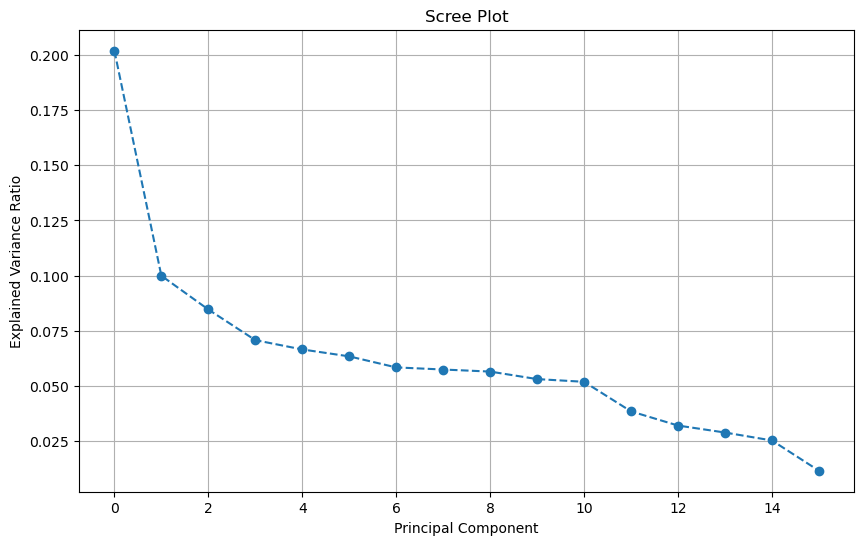


Variance of Components:
      PC  Variance  Eigenvalue
0    PC0      0.20        3.23
1    PC1      0.10        1.60
2    PC2      0.08        1.35
3    PC3      0.07        1.13
4    PC4      0.07        1.06
5    PC5      0.06        1.01
6    PC6      0.06        0.93
7    PC7      0.06        0.92
8    PC8      0.06        0.90
9    PC9      0.05        0.85
10  PC10      0.05        0.83
11  PC11      0.04        0.61
12  PC12      0.03        0.51
13  PC13      0.03        0.46
14  PC14      0.03        0.40
15  PC15      0.01        0.18

Loading Matrix:


,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
SquareFootage,0.32,-0.01,-0.16,-0.26,-0.06,0.19,-0.12,-0.22,0.17,-0.57,0.33,-0.15,0.03,-0.19,0.02,-0.43
NumBathrooms,0.28,-0.01,-0.18,-0.24,-0.09,0.21,-0.04,-0.16,0.18,0.74,-0.18,-0.11,-0.01,-0.15,-0.01,-0.32
NumBedrooms,0.29,-0.00,-0.11,0.03,0.33,-0.38,0.27,0.35,-0.43,-0.01,-0.09,-0.31,-0.00,0.08,-0.00,-0.39
BackyardSpace,0.10,0.01,0.03,0.07,-0.30,0.69,0.46,0.28,-0.32,-0.07,-0.04,0.06,-0.00,-0.04,-0.01,0.03
CrimeRate,-0.11,0.05,-0.04,-0.59,0.05,0.00,-0.17,0.64,0.23,-0.13,-0.28,0.18,0.01,-0.11,-0.00,0.02
SchoolRating,0.38,-0.01,-0.09,0.24,0.20,-0.12,-0.01,0.03,-0.07,0.01,0.01,0.61,0.02,-0.59,0.04,0.10
AgeOfHome,-0.15,-0.01,-0.08,-0.13,0.51,0.35,-0.23,-0.36,-0.36,-0.15,-0.48,0.01,0.00,-0.00,0.00,0.01
DistanceToCityCenter,-0.20,0.03,0.02,-0.03,0.44,0.28,-0.24,0.25,-0.14,0.27,0.69,-0.02,-0.00,-0.01,0.01,-0.01
EmploymentRate,0.13,-0.02,0.02,0.59,0.20,0.25,-0.23,0.29,0.45,-0.08,-0.24,-0.34,0.01,-0.05,0.03,-0.02
PropertyTaxRate,-0.14,0.01,0.04,-0.13,0.47,0.03,0.71,-0.16,0.45,-0.02,0.04,-0.01,0.00,-0.08,-0.00,0.07


In [105]:


pca_full = PCA()
pca_full.fit(X_scaled)

# 2. Generate Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range( len(pca_full.explained_variance_ratio_) ),
         pca_full.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# 3. Print Variance Info 
explained_variance = pd.DataFrame({
    'PC': [f'PC{i}' for i in range(len(pca_full.explained_variance_ratio_))],
    'Variance': pca_full.explained_variance_ratio_,
    'Eigenvalue': pca_full.explained_variance_
})
print("\nVariance of Components:")
print(explained_variance)



# 5. Display Loading Matrix as Table
loading_matrix = pd.DataFrame(
    pca_full.components_.T,
    columns=[f'PC{i}' for i in range(len(pca_full.components_))],
    index=X_scaled.columns
)
print("\nLoading Matrix:")
display(loading_matrix.round(2))

In [106]:
# Transform data using PCA with components 0-5
n_components = 6 
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame with PC columns
pc_columns = [f'PC{i}' for i in range(n_components)]
df_pca = pd.DataFrame(X_pca, columns=pc_columns)

print(f"PCA Dataset Shape: {df_pca.shape}")


# Add Price back 
# If Price was in X_scaled, we need to get it from the original df
if 'Price' in df.columns:
    df_pca['Price'] = df['Price'].values
    
    # Split into train and test sets
    X_pca_train, X_pca_test, y_train, y_test = train_test_split(
        df_pca.drop(columns=['Price']), 
        df_pca['Price'], 
        test_size=0.2, 
        random_state=42
    )
    
    # Combine features and target for export
    train_pca_export = X_pca_train.copy()
    train_pca_export['Price'] = y_train
    train_pca_export.to_csv('train_data_pca.csv', index=False)
    
    test_pca_export = X_pca_test.copy()
    test_pca_export['Price'] = y_test
    test_pca_export.to_csv('test_data_pca.csv', index=False)
    print("\nFiles saved:")

else:
    print("\nWarning: 'Price' column not found in original dataframe.")

PCA Dataset Shape: (6922, 6)

Files saved:


In [107]:
# Use the PCA train/test sets from the previous cell
# Add Constant for Statsmodels (OLS requires an intercept column)
X_train_pca_const = sm.add_constant(X_pca_train)
X_test_pca_const = sm.add_constant(X_pca_test)

# Fit the OLS Model using PCA components
model = sm.OLS(y_train, X_train_pca_const).fit()

# Print Summary (R-squared, Coefficients, P-values)
print(model.summary())

# Predictions
y_train_pred = model.predict(X_train_pca_const)
y_test_pred = model.predict(X_test_pca_const)

# Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"\nMSE Train: {mse_train:,.2f}")
print(f"MSE Test:  {mse_test:,.2f}")

# Root Mean Squared Error (RMSE) - easier to interpret (in dollars)
print(f"RMSE Train: ${np.sqrt(mse_train):,.2f}")
print(f"RMSE Test:  ${np.sqrt(mse_test):,.2f}")

# Display Coefficients for Principal Components
print("\nCoefficients for Principal Components:")
for feature, coef in model.params.items():
    if feature == 'const':
        print(f"  {feature}: ${coef:,.2f}")
    else:
        print(f"  {feature}: {coef:,.4f}")

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     1601.
Date:                Sun, 30 Nov 2025   Prob (F-statistic):               0.00
Time:                        12:10:45   Log-Likelihood:                -71081.
No. Observations:                5537   AIC:                         1.422e+05
Df Residuals:                    5530   BIC:                         1.422e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.088e+05   1223.815    252.362      0.0

In [110]:
# Drop PC1 as requested and re-run the model
print("\nModel without PC1")

X_pca_train_dropped = X_pca_train.drop(columns=['PC1'])
X_pca_test_dropped = X_pca_test.drop(columns=['PC1'])

# Add Constant for Statsmodels (OLS requires an intercept column)
X_train_pca_const_dropped = sm.add_constant(X_pca_train_dropped)
X_test_pca_const_dropped = sm.add_constant(X_pca_test_dropped)

# Fit the OLS Model using PCA components
model_dropped = sm.OLS(y_train, X_train_pca_const_dropped).fit()

# Print Summary (R-squared, Coefficients, P-values)
print(model_dropped.summary())

# Predictions
y_train_pred_dropped = model_dropped.predict(X_train_pca_const_dropped)
y_test_pred_dropped = model_dropped.predict(X_test_pca_const_dropped)

# Mean Squared Error
mse_train_dropped = mean_squared_error(y_train, y_train_pred_dropped)
mse_test_dropped = mean_squared_error(y_test, y_test_pred_dropped)

print(f"\nMSE Train (No PC1): {mse_train_dropped:,.2f}")
print(f"MSE Test (No PC1):  {mse_test_dropped:,.2f}")

# Root Mean Squared Error (RMSE)
print(f"RMSE Train (No PC1): ${np.sqrt(mse_train_dropped):,.2f}")
print(f"RMSE Test (No PC1):  ${np.sqrt(mse_test_dropped):,.2f}")

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1e-10, y_true))) * 100

mape_train_dropped = mean_absolute_percentage_error(y_train, y_train_pred_dropped)
mape_test_dropped = mean_absolute_percentage_error(y_test, y_test_pred_dropped)

print(f"\nMAPE Train (No PC1): {mape_train_dropped:,.2f}%")
print(f"MAPE Test (No PC1):  {mape_test_dropped:,.2f}%")


Model without PC1
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     1921.
Date:                Sun, 30 Nov 2025   Prob (F-statistic):               0.00
Time:                        12:37:47   Log-Likelihood:                -71082.
No. Observations:                5537   AIC:                         1.422e+05
Df Residuals:                    5531   BIC:                         1.422e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.088e+05   1223.876 

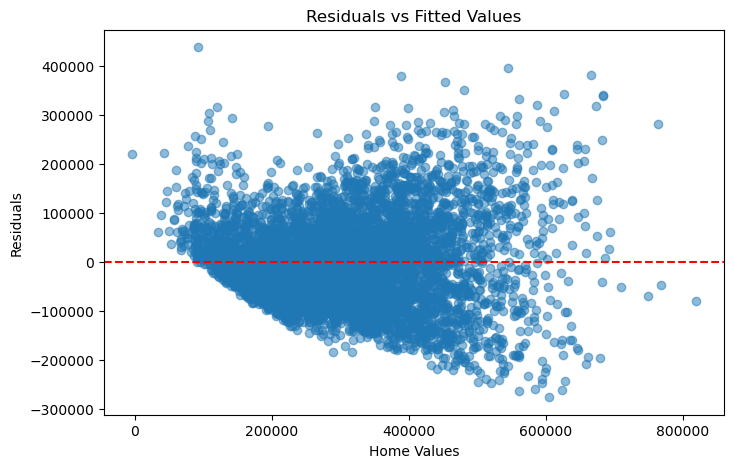

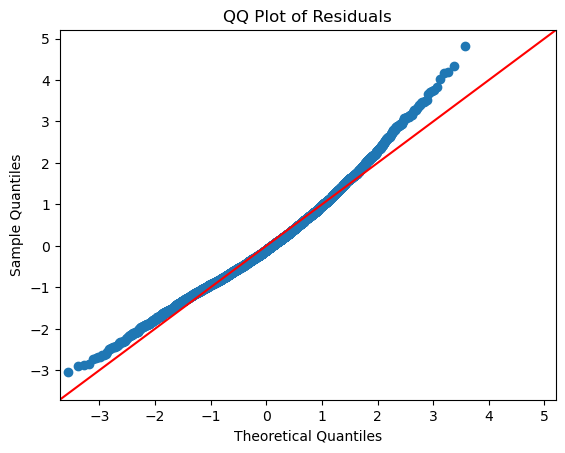

In [111]:
# 1. Residuals vs Fitted (Check for Homoscedasticity)
residuals = model.resid
plt.figure(figsize=(8, 5))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Home Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# 2. Normality of Residuals (QQ Plot)
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()